In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='b9006a3a-d726-493a-bfb6-07cfeaa4a9ef', project_access_token='p-9494b0474c007b7122d4fb087bcbeef6d78c7399')
pc = project.project_context

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install imbalanced-learn --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

In [2]:
import pandas as pd

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a0dc4e5dcc2e45a6897497bfd538e59b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dxOcFVkGk9TqIgh3nrm5eKZ9zcyMUdWf5XTPxPiT7Utb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a0dc4e5dcc2e45a6897497bfd538e59b.get_object(Bucket='desafio7-donotdelete-pr-xdv6vvo4gz9si3',Key='training_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

In [4]:
df_training_dataset = df_data_1
df_training_dataset.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero
54842,39,16,Hospital São Paulo,-23.5984,-46.6455,27,26877,47,22,30,NORMAL,11,2019-12-29,65
54843,39,16,Hospital São Paulo,-23.5984,-46.6455,27,26877,47,22,30,NORMAL,11,2019-12-29,65
54844,39,16,Hospital São Paulo,-23.5984,-46.6455,27,26877,47,22,30,NORMAL,11,2019-12-29,65
54845,35,10,Hospital São Paulo,-23.5984,-46.6455,22,26759,42,9,26,NORMAL,8,2019-12-30,56
54846,35,10,Hospital São Paulo,-23.5984,-46.6455,22,26759,42,9,26,NORMAL,8,2019-12-30,56


In [ ]:
#df_training_dataset.info()

In [ ]:
#df_training_dataset.nunique()

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np

def replaceNanByZero(df_data):
  impute_zeros = SimpleImputer(
      missing_values=np.nan,
      strategy='constant',
      fill_value=0,
      verbose=0,
      copy=True
  )
  # Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
  impute_zeros.fit(X=df_data)
  # Reconstruindo um Pandas DataFrame com os resultados
  return pd.DataFrame.from_records(
      data=impute_zeros.transform(
          X=df_data
      ),
      columns=df_data.columns
  )

df_training_dataset = replaceNanByZero(df_training_dataset)

print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
dtype: int64



In [7]:
df_training_dataset = df_training_dataset.drop(columns=['Estação','LAT','LONG','Tempo'], inplace=False)

In [8]:
df_training_dataset.drop_duplicates(inplace=True) 

In [9]:
df_training_dataset.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero
54830,11,25,38,25702,54,53,37,NORMAL,23,26
54834,5,21,33,26236,52,43,35,REABASTECER,18,17
54836,43,16,28,27174,50,34,32,NORMAL,15,9
54841,39,16,27,26877,47,22,30,NORMAL,11,65
54845,35,10,22,26759,42,9,26,NORMAL,8,56


## Treinando um classificador com base em uma árvore de decisão

In [10]:
df_training_dataset.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação', 'Original_269',
       'Original_473', 'Pêssego', 'TARGET', 'Tangerina', 'Zero'],
      dtype='object')

In [11]:
features = df_training_dataset[
    [
     'Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação', 'Original_269',
       'Original_473', 'Pêssego', 'Tangerina', 'Zero'
    ]
]

target = df_training_dataset['TARGET'] 

In [12]:
X = features
y = target 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

### Treinando com Random forest

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( 
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=15,
    max_features=0.25,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    min_samples_leaf=1,
    min_samples_split=6,
    min_weight_fraction_leaf=0.0,
    n_estimators=250,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

i = 1
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf.fit(X_train, y_train)
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf.predict(X_test))}")
  i += 1

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 4)))

Accuracy for the fold no. 1 on the test set: 0.7649755501222494
Accuracy for the fold no. 2 on the test set: 0.777200488997555
Accuracy for the fold no. 3 on the test set: 0.7790342298288508
Accuracy for the fold no. 4 on the test set: 0.7744498777506112
Accuracy for the fold no. 5 on the test set: 0.772782874617737
Acurácia: 78.23%


### Analisando a qualidade do modelo através da matriz de confusão

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

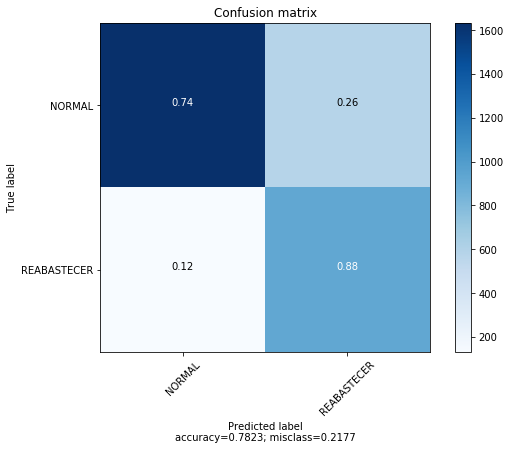

In [19]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       0.93      0.74      0.82      2215
 REABASTECER       0.61      0.88      0.72      1055

   micro avg       0.78      0.78      0.78      3270
   macro avg       0.77      0.81      0.77      3270
weighted avg       0.83      0.78      0.79      3270



<hr>

## Scoring dos dados necessários para entregar a solução

In [21]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-09 03:22:54--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

    [ <=>                                   ] 70,291      --.-K/s   in 0.002s  

2020-09-09 03:22:54 (29.0 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [22]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [23]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
Tempo           984 non-null object
Estação         984 non-null object
LAT             984 non-null float64
LONG            984 non-null float64
Movimentação    984 non-null int64
Original_473    984 non-null int64
Original_269    984 non-null int64
Zero            984 non-null int64
Maçã-Verde      984 non-null int64
Tangerina       984 non-null int64
Citrus          984 non-null int64
Açaí-Guaraná    984 non-null int64
Pêssego         984 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 100.0+ KB


In [24]:
df_to_be_scored_1 = replaceNanByZero(df_to_be_scored)
df_to_be_scored_2 = df_to_be_scored_1.drop(columns=['Estação','LAT','LONG','Tempo'], inplace=False)
df_to_be_scored_3 = df_to_be_scored_2
df_to_be_scored_3.tail()

,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,26787,34,65,28,17,33,27,6,2
980,26629,21,60,18,15,27,22,43,43
981,27517,9,56,13,14,21,17,37,37
982,26860,86,49,7,14,17,12,33,33
983,24571,74,41,65,8,14,7,27,27


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [25]:
features = df_training_dataset[
    [
     'Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação', 'Original_269',
       'Original_473', 'Pêssego', 'Tangerina', 'Zero'
    ]
]

target = df_training_dataset['TARGET'] 

In [26]:
df_to_be_scored_3.columns

Index(['Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde',
       'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [27]:
y_pred = clf.predict(df_to_be_scored_3)
df_to_be_scored_3['TARGET'] = y_pred
df_to_be_scored_3.tail()

,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,26787,34,65,28,17,33,27,6,2,REABASTECER
980,26629,21,60,18,15,27,22,43,43,NORMAL
981,27517,9,56,13,14,21,17,37,37,NORMAL
982,26860,86,49,7,14,17,12,33,33,NORMAL
983,24571,74,41,65,8,14,7,27,27,REABASTECER


In [28]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio7-donotdelete-pr-xdv6vvo4gz9si3',
 'asset_id': '60720136-5f08-450e-a5a4-8fdab8396070'}

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
